In [2]:
using CairoMakie

In [3]:
set_theme!(theme_dark())

In [10]:
include("ces_code.jl")

gini_coeff (generic function with 1 method)

In [8]:
model_CES_γ_2 = create_CES_model(how_iter = 10)

(n = 1919, na = 101, nz = 19, α = 0.33, A = 0.01, δ = 0.08, β = 0.9, γ = 2.0, r_lb = 0.0, r_ub = 0.11111111111111116, r_iter = 0.0, w = 1.0, ρ = 0.9, μ = 0.0, σ = 0.003, θ = 4.0, ϕ = 0.0, lb = 0.0, ub = 10000.0, toler = 4.0e-7, print_skip = 100, max_iter = 1000, how_iter = 10, toler_prices = 0.001, max_iter_prices = 100, print_skip_prices = 1, agrid = [0.0, 0.0001, 0.0016, 0.008099999999999998, 0.0256, 0.06250000000000001, 0.12959999999999997, 0.2401000000000001, 0.4096, 0.6560999999999999  …  6857.496100000001, 7163.9296, 7480.5201000000025, 7807.489599999998, 8145.062499999999, 8493.465599999998, 8852.9281, 9223.681599999998, 9605.9601, 10000.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.86

In [11]:
@time begin
    v_ces_hpi, pol_ces_hpi, dist_ces_hpi, wealth_ces_hpi, cap_demand_hpi, cap_supply_hpi, rates_ces_hpi = equilibrium_hpi_CES(model_CES_γ_2)
end

Iterating on prices...
////////////////////
Price Iteration: 0
Iterating...
--------------------
Iteration: 0, Error: 0.3568405374811952
--------------------
Iteration: 100, Error: 3.128571140779592e-5
--------------------
Converged in 157 iterations for r = 0.05555555555555558 and w = 0.016858265807657185
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 0, Ks = 0.07089820907786691, Kd = 0.049144974801661453, diff = 0.021753234276205458
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 1
Iterating...
--------------------
Iteration: 0, Error: 0.026981347400815345
--------------------
Iteration: 100, Error: 2.892935420127687e-5
--------------------
Converged in 165 iterations for r = 0.02777777777777779 and w = 0.01818347856683305
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 1, Ks = 0.053166067415851316, Kd = 0.06181120542064637, diff = -0.008645138004795057
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 2
Iterating...
--------------------
Iteration: 0, Error: 0.

([0.0033381624902846458 0.0047389492805359305 … 0.05276219116824467 0.06681524265214926; 0.004067620014880903 0.0053698867592616405 … 0.05276743400919962 0.06682031536128386; … ; 462.4630763291948 462.4630859132064 … 462.4876548011435 462.5006532512738; 481.4320878074921 481.4320973915035 … 481.456666279437 481.46966472956535], [2.557957369123991e-16 2.2934412965879137e-16 … 0.4553841213131554 0.7139215909726743; 3.737130296638965e-16 3.0773558130252946e-16 … 0.4554804023330742 0.7140179858402828; … ; 9277.59822234208 9277.598414621902 … 9278.091336498132 9278.352122426099; 9658.170622481191 9658.170814761435 … 9658.66373663721 9658.924522571659], [1.2859235909791348e-7 2.612288506908907e-6 … 2.6122470663994413e-6 1.2843540158979505e-7; 9.890513042510355e-8 2.07791839224939e-6 … 2.0778768960255013e-6 9.874817404670734e-8; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0003904615852394519 0.0005968069294830611 … 0.5295690064229311 0.8094277763044115; 0.0004941074185727852 0.0007004527628

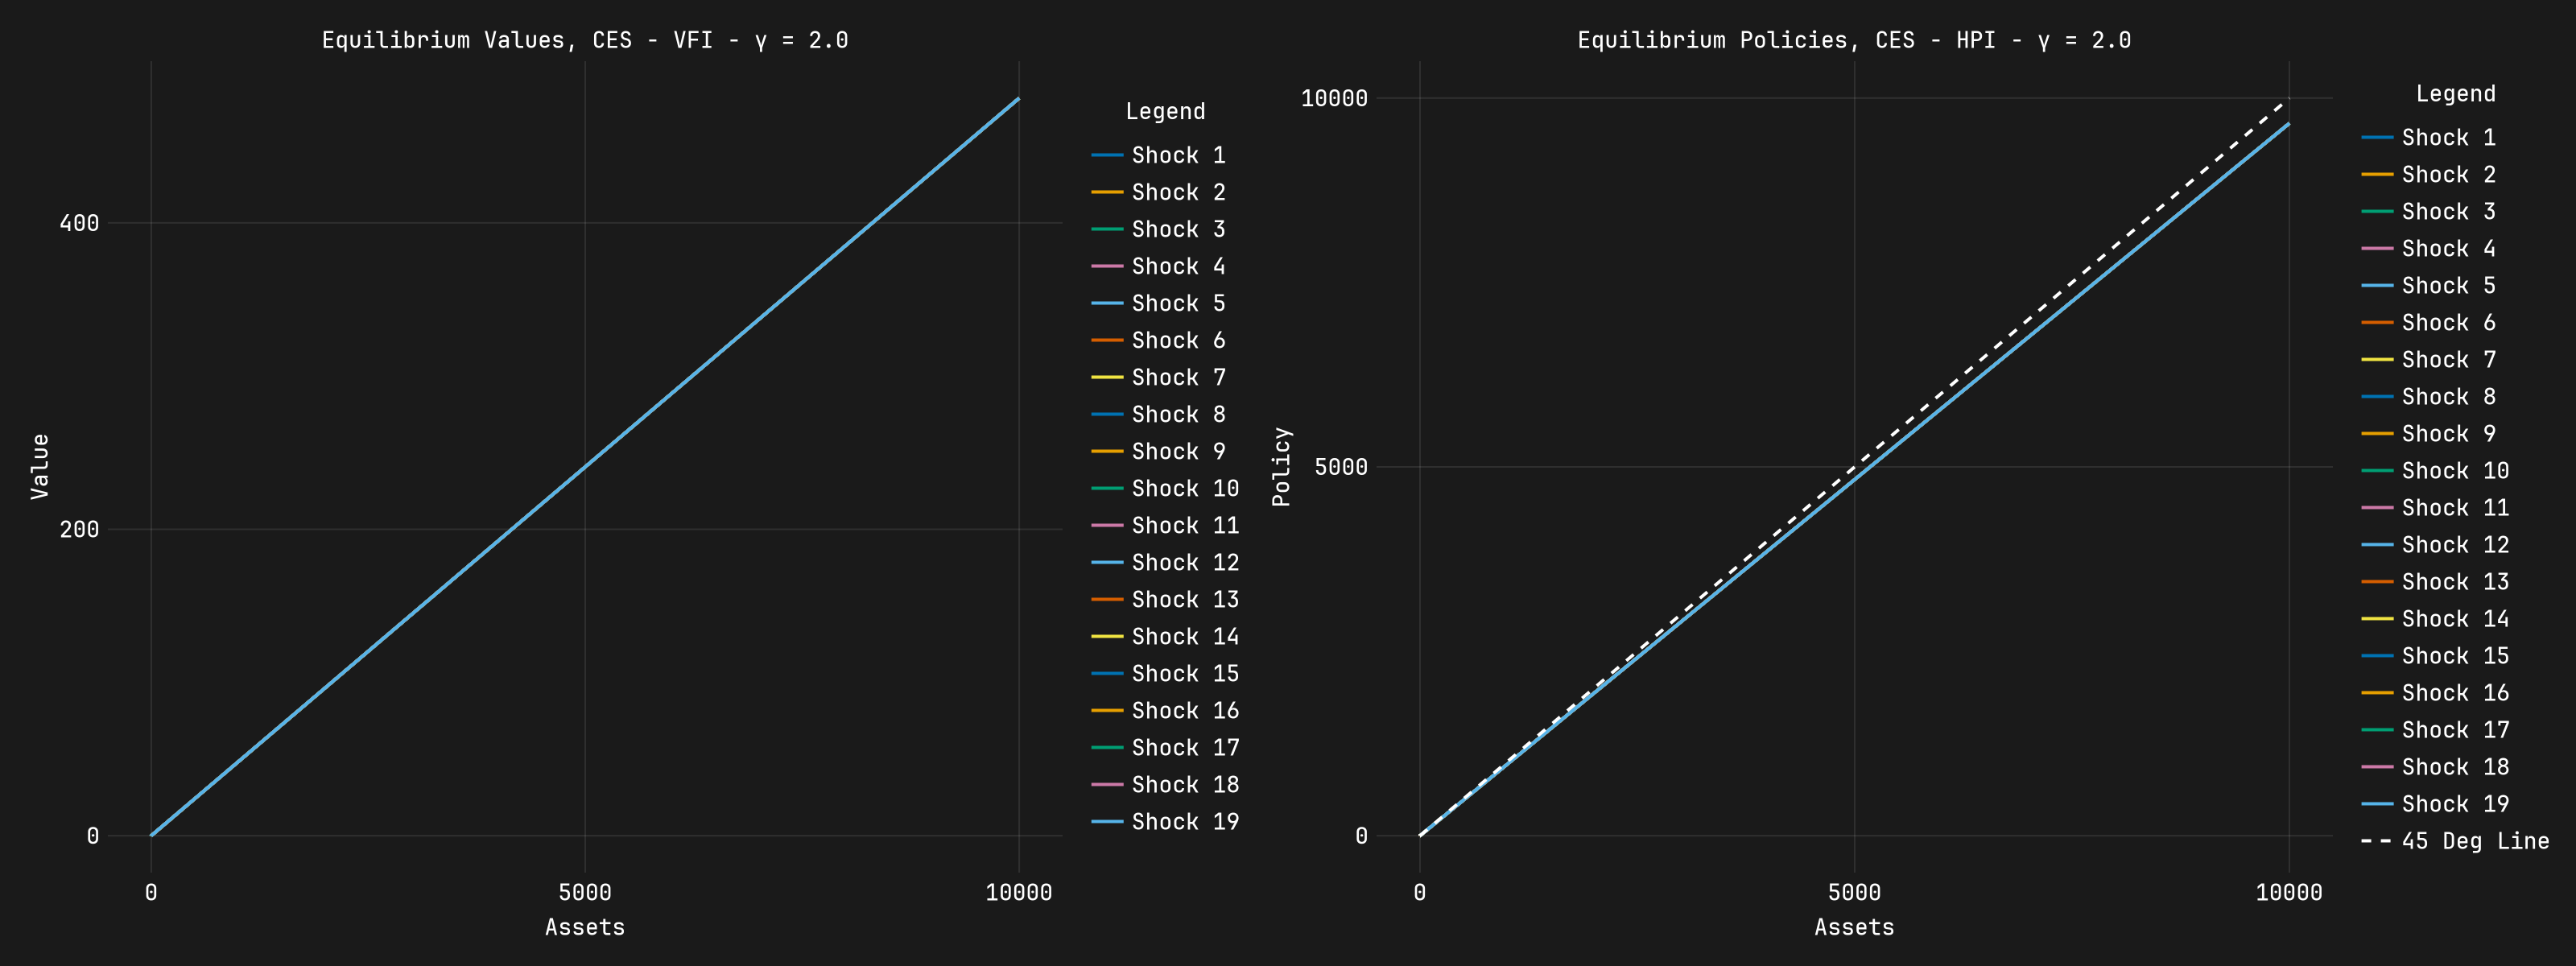

In [13]:
fig1 = Figure(size = (1600, 600))
ax = Axis(fig1[1, 1], 
        xlabel = "Assets", 
        ylabel = "Value", 
        title = "Equilibrium Values, CES - VFI - γ = 2.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model_CES_γ_2.nz
    lines!(ax, model_CES_γ_2.agrid, v_ces_hpi[:,j], linewidth = 2, label = "Shock $j")
end
legend = Legend(fig1[1, 2], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
ax = Axis(fig1[1,3], 
        xlabel = "Assets", 
        ylabel = "Policy", 
        title = "Equilibrium Policies, CES - HPI - γ = 2.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model_CES_γ_2.nz
    lines!(ax,  model_CES_γ_2.agrid, pol_ces_hpi[:,j], linewidth = 2, label = "Shock $j")
end
lines!(ax, model_CES_γ_2.agrid,  model_CES_γ_2.agrid, color = :white, linewidth = 2, label = "45 Deg Line", linestyle = :dash)
legend = Legend(fig1[1, 4], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
fig1

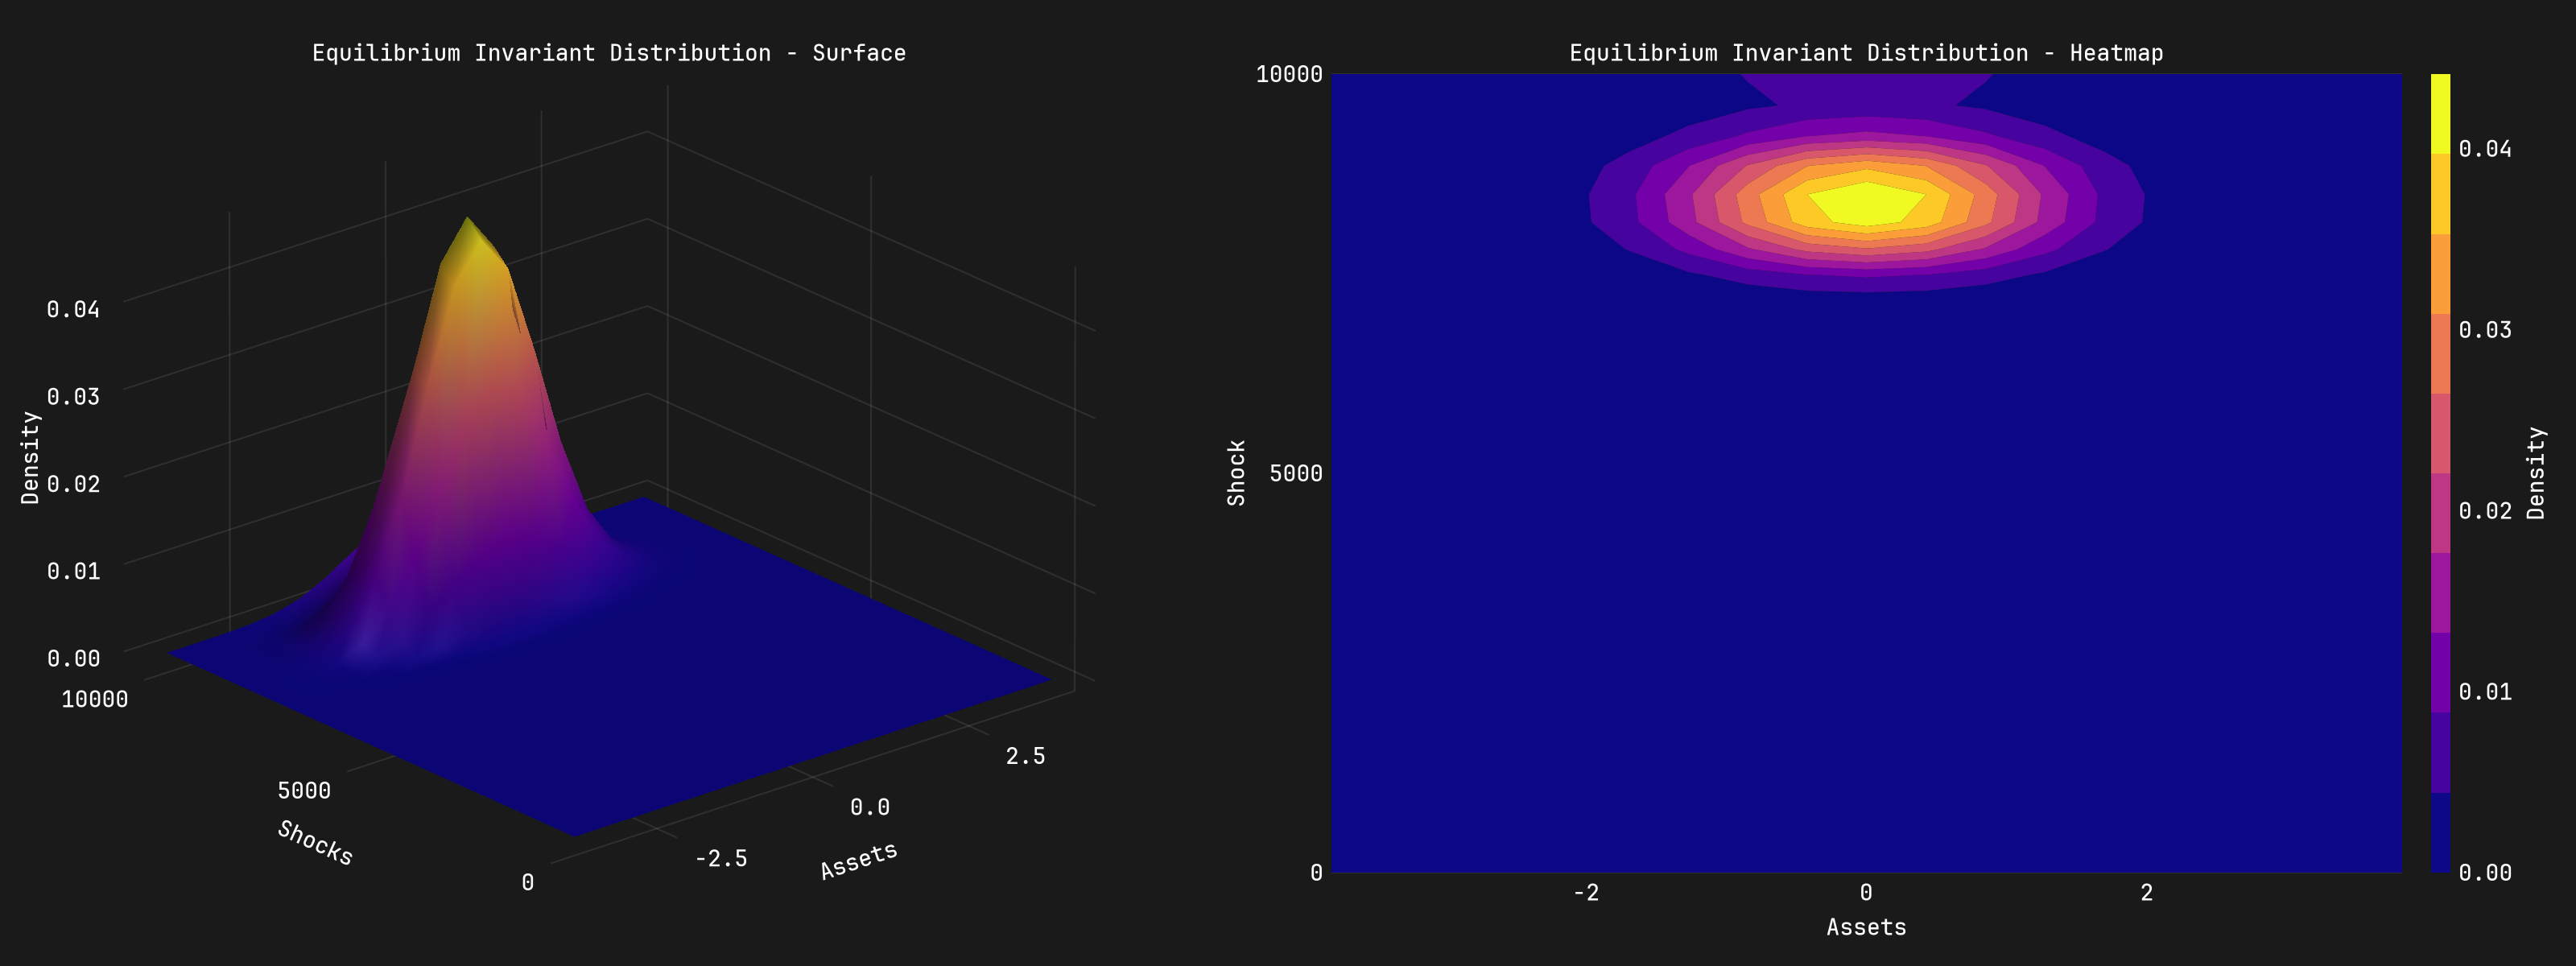

In [14]:
fig2 = Figure(size = (1600, 600))

ax = Axis3(fig2[1,1],
            xlabel = "Assets", 
            ylabel = "Shocks", 
            zlabel = "Density",
            title = "Equilibrium Invariant Distribution - Surface", 
            titlecolor = :white,
            titlefont = "JetBrains Mono",
            xlabelfont = "JetBrains Mono",
            xlabelcolor = :white,
            ylabelfont = "JetBrains Mono",
            ylabelcolor = :white,
            zlabelfont = "JetBrains Mono",
            zlabelcolor = :white,
            xticklabelcolor = :white, 
            yticklabelcolor = :white,
            zticklabelcolor = :white, 
            xticklabelfont = "JetBrains Mono", 
            yticklabelfont = "JetBrains Mono",
            zticklabelfont = "JetBrains Mono")

surface!(ax, model_CES_γ_2.zgrid, model_CES_γ_2.agrid, reverse(dist_ces_hpi', dims = 2), colormap = :plasma)

ax = Axis(fig2[1,2], 
        xlabel = "Assets", 
        ylabel = "Shock",
        title = "Equilibrium Invariant Distribution - Heatmap",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white,
        yticklabelcolor = :white,
        xticklabelfont = "JetBrains Mono",
        yticklabelfont = "JetBrains Mono")

co = contourf!(ax, model_CES_γ_2.zgrid, model_CES_γ_2.agrid, reverse(dist_ces_hpi', dims = 2), colormap = :plasma)

cb = Colorbar(fig2[1,3], co)
cb.labelcolor = :white
cb.ticklabelcolor = :white
cb.ticklabelfont = "JetBrains Mono"
cb.labelfont = "JetBrains Mono"
cb.labelsize = 14
cb.label = "Density"

fig2

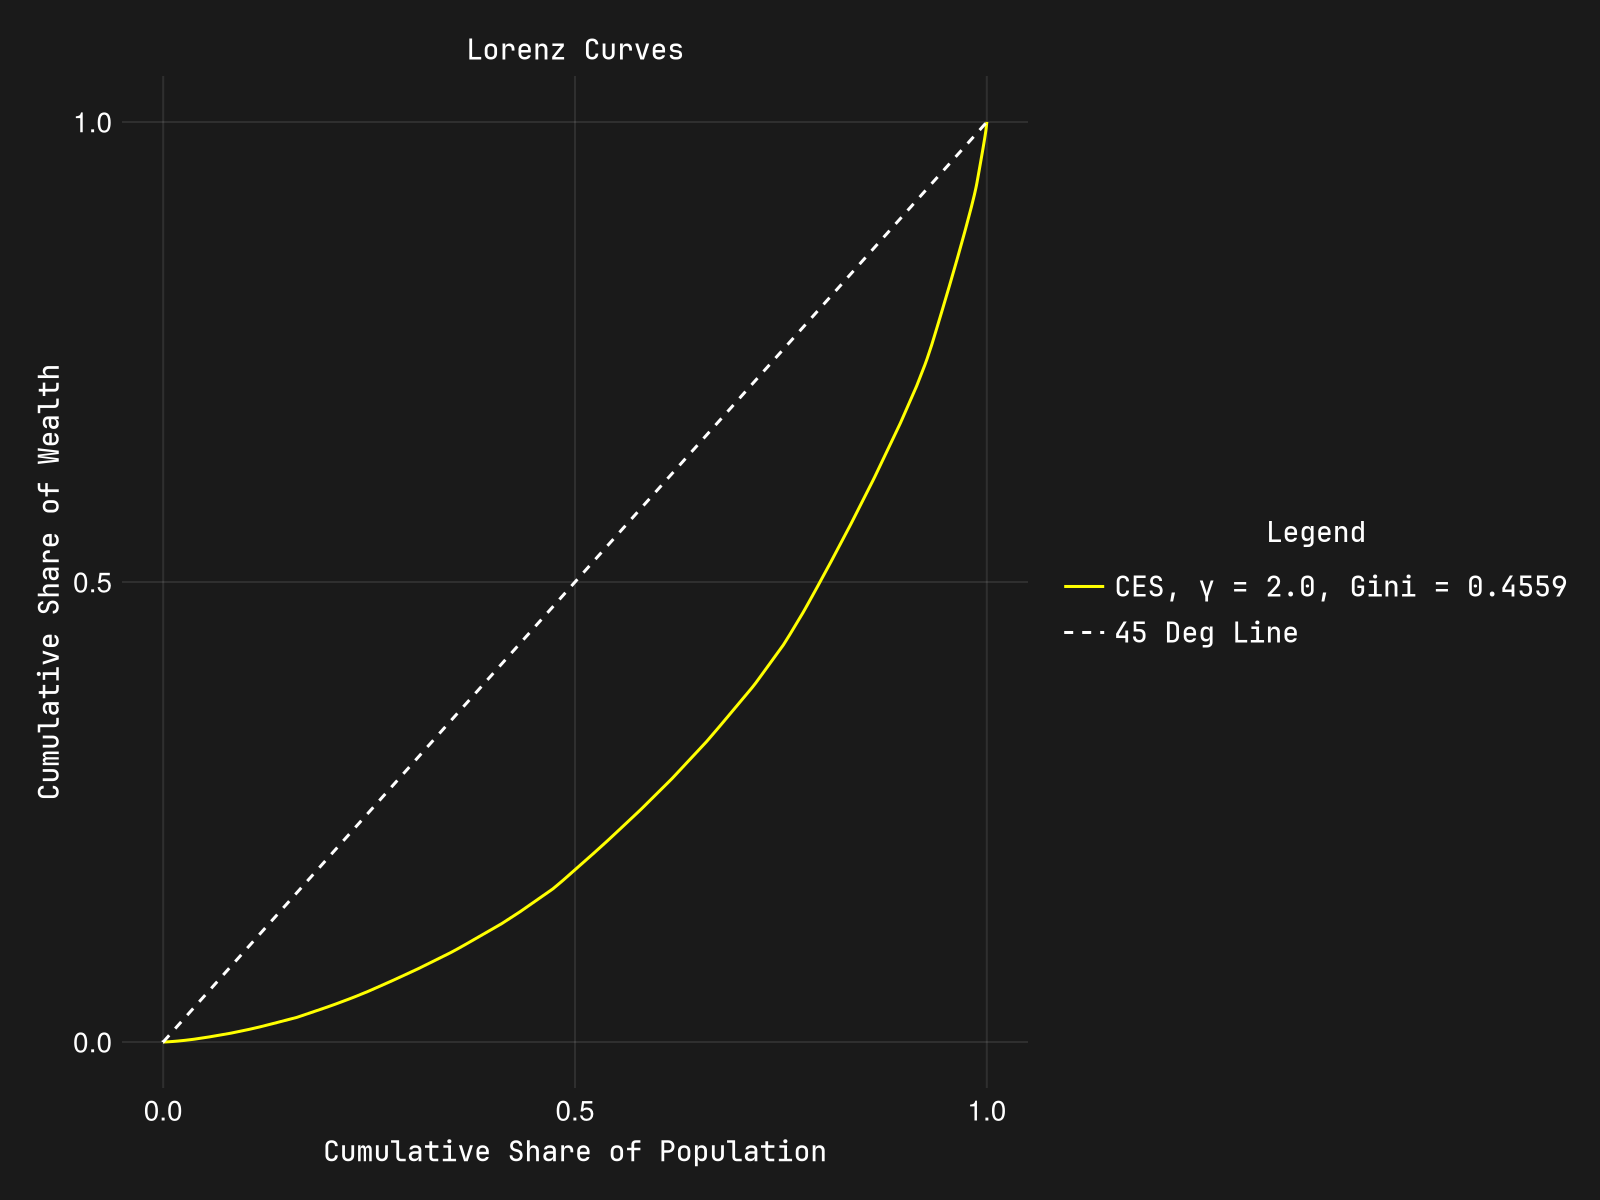

In [15]:
l1, d1, g1 = gini_coeff(dist_ces_hpi, wealth_ces_hpi, model_CES_γ_2)

fig = Figure(size = (800,600))
ax = Axis(fig[1,1], 
          xlabel = "Cumulative Share of Population", 
          ylabel = "Cumulative Share of Wealth", 
          title = "Lorenz Curves",
          titlecolor = :white,
          titlefont = "JetBrains Mono",
          xlabelfont = "JetBrains Mono",
          xlabelcolor = :white,
          ylabelfont = "JetBrains Mono",
          ylabelcolor = :white,
          xticklabelcolor = :white,
          yticklabelcolor = :white)
lines!(ax, d1, l1, label = "CES, γ = 2.0, Gini = $g1", color = :yellow)
lines!(ax, d1, d1, label = "45 Deg Line", color = :white, linestyle = :dash)
legend = Legend(fig[1,2], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono",
                labelcolor = :white,
                titlefont = "JetBrains Mono",
                titlecolor = :white)
fig